In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import talib
import numpy as np
import lightgbm as lgb

In [59]:
#Step1 Get Original Data from Interactivebroker
filename = "SPY_20040123_20200529_30min.csv" #from IB
df = pd.read_csv(filename,index_col = 0)
# df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head(1))
print(df.tail(1))

(54688, 7)
                        open     high      low    close  volume  average  \
date                                                                       
2004-01-23 08:30:00  115.015  115.155  114.895  115.005      -1     -1.0   

                     barCount  
date                           
2004-01-23 08:30:00        -1  
                       open    high      low    close  volume  average  \
date                                                                     
2020-05-29 14:30:00  303.63  304.96  303.315  304.025      -1     -1.0   

                     barCount  
date                           
2020-05-29 14:30:00        -1  


In [60]:
#Step2 check data

#Check NAN
print(df.isnull().values.any() )

# #check Outlier
# plt.style.use("ggplot")
# plt.rcParams["figure.figsize"]=(20,5)
# df.plot()

False


In [61]:
print( df.info() )
print(type(df.index[0]), df.index[0])
df.index = pd.to_datetime(df.index)
print( df.info() )
print(type(df.index[0]), df.index[0])

<class 'pandas.core.frame.DataFrame'>
Index: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      54688 non-null  float64
 1   high      54688 non-null  float64
 2   low       54688 non-null  float64
 3   close     54688 non-null  float64
 4   volume    54688 non-null  int64  
 5   average   54688 non-null  float64
 6   barCount  54688 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 3.3+ MB
None
<class 'str'> 2004-01-23 08:30:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      54688 non-null  float64
 1   high      54688 non-null  float64
 2   low       54688 non-null  float64
 3   close     54688 non-null  float64
 4   volume    54688 non-null  int64  
 5   ave

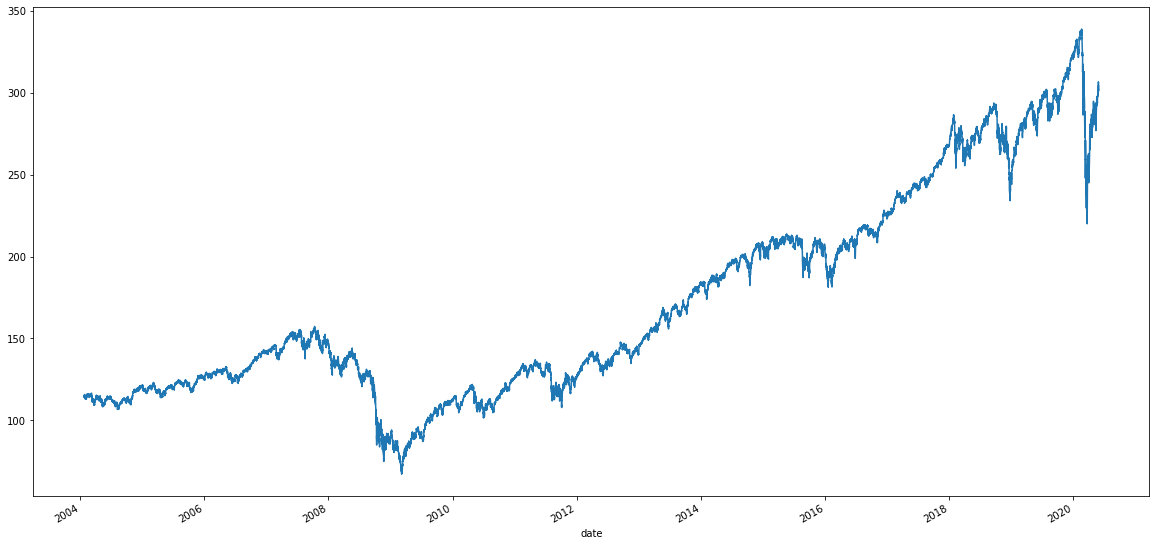

In [62]:
#Step Clean Data
tc=df.close #targetclose
plt.rcParams["figure.figsize"] = (20,10)
tc.plot()

In [63]:
sma = talib.SMA(tc, timeperiod=120)
wma = talib.WMA(tc, timeperiod=120)
mom = talib.MOM(tc, timeperiod=120)
k, d = talib.STOCH  (tc, tc, tc, fastk_period=120, slowk_period=60, slowd_period=60)
k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=240, slowk_period=120, slowd_period=120)
k3, d3 = talib.STOCH(tc, tc, tc, fastk_period=360, slowk_period=180, slowd_period=180)
k4, d4 = talib.STOCH(tc, tc, tc, fastk_period=480, slowk_period=240, slowd_period=240)
k5, d5 = talib.STOCH(tc, tc, tc, fastk_period=640, slowk_period=320, slowd_period=320)
k6, d6 = talib.STOCH(tc, tc, tc, fastk_period=720, slowk_period=360, slowd_period=360)
k7, d7 = talib.STOCH(tc, tc, tc, fastk_period=840, slowk_period=420, slowd_period=420)
k8, d8 = talib.STOCH(tc, tc, tc, fastk_period=960, slowk_period=480, slowd_period=480)

rsi = talib.RSI (tc, timeperiod=120)
rsi2 = talib.RSI(tc, timeperiod=240)
rsi3 = talib.RSI(tc, timeperiod=480)
rsi4 = talib.RSI(tc, timeperiod=640)
rsi5 = talib.RSI(tc, timeperiod=720)
rsi6 = talib.RSI(tc, timeperiod=840)

macd1, macd2, macd3 = talib.MACD(tc, fastperiod=120, slowperiod=60, signalperiod=60)
willr = talib.WILLR(tc, tc, tc, timeperiod=120)
cci = talib.CCI(tc, tc, tc, timeperiod=120)

dataset = pd.DataFrame({
    'RSIb': rsi / 50,
    'RSIb2': rsi2 / 50,
    'RSIb3': rsi3 / 50,
    'RSIb4': rsi4 / 50,
    'RSIb5': rsi5 / 50,
    'RSIb6': rsi6 / 50,
    'MOMb': mom - 0,
    'KDb': k - d,
    'KDb2': k2 - d2,
    'KDb3': k3 - d3,
    'KDb4': k4 - d4,
    'KDb5': k5 - d5,
    'KDb6': k6 - d6,
    'KDb7': k7 - d7,
    'KDb8': k8 - d8,
    
    'a5':   (tc.rolling(5).mean()   / tc),
    'a10':  (tc.rolling(10).mean()  / tc),
    'a20':  (tc.rolling(20).mean()  / tc),
    'a40':  (tc.rolling(40).mean()  / tc),
    'a80':  (tc.rolling(80).mean()  / tc),
    'a160': (tc.rolling(160).mean() / tc),
    'a320': (tc.rolling(320).mean() / tc),
    'a640': (tc.rolling(640).mean() / tc),
    'a720': (tc.rolling(720).mean() / tc),
    'a840': (tc.rolling(840).mean() / tc),
    'a960': (tc.rolling(960).mean() / tc),
    'a1024':(tc.rolling(1024).mean() / tc),
    'b1': tc/tc.shift(50),
    'b2': tc/tc.shift(100),
    'b3': tc/tc.shift(150),
    'b4': tc/tc.shift(200),
    'b5': tc/tc.shift(250),
    'b6': tc/tc.shift(300),
    'b7': tc/tc.shift(350),
    'LINEARREG_SLOPE0': talib.LINEARREG_SLOPE(tc, 60),
    'LINEARREG_SLOPE1': talib.LINEARREG_SLOPE(tc, 120),

    'ADXR0': talib.ADXR(tc, tc, tc, 60),
    'ADXR1': talib.ADXR(tc, tc, tc, 120),
    'ADXR2': talib.ADXR(tc, tc, tc, 240),
    'ADXR3': talib.ADXR(tc, tc, tc, 360),
    'ADXR4': talib.ADXR(tc, tc, tc, 480),
    'ADXR5': talib.ADXR(tc, tc, tc, 640),

    'return': tc.shift(-10) > tc,
})

feature_names = list(dataset.columns[:-1])

In [64]:
print(dataset.head(1))
print(dataset.isnull().values.any() )

                     RSIb  RSIb2  RSIb3  RSIb4  RSIb5  RSIb6  MOMb  KDb  KDb2  \
date                                                                            
2004-01-23 08:30:00   NaN    NaN    NaN    NaN    NaN    NaN   NaN  NaN   NaN   

                     KDb3  ...  b7  LINEARREG_SLOPE0  LINEARREG_SLOPE1  ADXR0  \
date                       ...                                                  
2004-01-23 08:30:00   NaN  ... NaN               NaN               NaN    NaN   

                     ADXR1  ADXR2  ADXR3  ADXR4  ADXR5  return  
date                                                            
2004-01-23 08:30:00    NaN    NaN    NaN    NaN    NaN   False  

[1 rows x 43 columns]
True


In [65]:
print("before dropping NaN", dataset.shape)
dataset.dropna(inplace=True)
print("after dropping NaN", dataset.shape)


before dropping NaN (54688, 43)
after dropping NaN (52770, 43)


In [66]:
print(dataset.head())

                         RSIb     RSIb2     RSIb3     RSIb4     RSIb5  \
date                                                                    
2004-08-13 09:30:00  0.898126  0.919475  0.945550  0.953985  0.957368   
2004-08-13 10:00:00  0.901177  0.921011  0.946309  0.954549  0.957868   
2004-08-13 10:30:00  0.902292  0.921572  0.946585  0.954754  0.958049   
2004-08-13 11:00:00  0.891125  0.915724  0.943548  0.952460  0.956005   
2004-08-13 11:30:00  0.889087  0.914654  0.942991  0.952039  0.955630   

                        RSIb6   MOMb       KDb      KDb2      KDb3  ...  \
date                                                                ...   
2004-08-13 09:30:00  0.961228 -3.920 -7.537691 -7.806112  3.621879  ...   
2004-08-13 10:00:00  0.961654 -3.840 -6.910248 -8.283085  3.512205  ...   
2004-08-13 10:30:00  0.961809 -3.620 -6.370189 -8.708485  3.402125  ...   
2004-08-13 11:00:00  0.960052 -4.115 -5.949603 -9.218659  3.278187  ...   
2004-08-13 11:30:00  0.959730 -4.240 -

In [67]:
print(feature_names)

['RSIb', 'RSIb2', 'RSIb3', 'RSIb4', 'RSIb5', 'RSIb6', 'MOMb', 'KDb', 'KDb2', 'KDb3', 'KDb4', 'KDb5', 'KDb6', 'KDb7', 'KDb8', 'a5', 'a10', 'a20', 'a40', 'a80', 'a160', 'a320', 'a640', 'a720', 'a840', 'a960', 'a1024', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'LINEARREG_SLOPE0', 'LINEARREG_SLOPE1', 'ADXR0', 'ADXR1', 'ADXR2', 'ADXR3', 'ADXR4', 'ADXR5']


In [68]:
# print(dataset.tail(2))
print( 2004+(20-4)*0.8)
print( dataset[:'2015'].tail(1) )
print( " ------------------------------------------------------------------------------------------------------- ")
print(dataset['2016':].head(1) )

2016.8
                         RSIb     RSIb2     RSIb3     RSIb4    RSIb5  \
date                                                                   
2015-12-31 14:30:00  0.962596  0.980322  0.993542  0.995614  0.99614   

                        RSIb6  MOMb        KDb      KDb2     KDb3  ...  \
date                                                               ...   
2015-12-31 14:30:00  0.996722 -1.87  16.958256  5.600668 -7.69456  ...   

                           b7  LINEARREG_SLOPE0  LINEARREG_SLOPE1     ADXR0  \
date                                                                          
2015-12-31 14:30:00  0.971789          0.001511          0.037501  7.481126   

                        ADXR1     ADXR2     ADXR3     ADXR4     ADXR5  return  
date                                                                           
2015-12-31 14:30:00  4.751926  4.102653  3.138122  2.656559  2.179414   False  

[1 rows x 43 columns]
 ---------------------------------------------------

In [69]:
dataset_train = dataset[:'2016']
dataset_test = dataset['2016':]

train = dataset_train[feature_names], dataset_train['return']
test = dataset_test[feature_names], dataset_test['return']

gbm = lgb.LGBMClassifier(n_estimators=1000, random_state=5, learning_rate=0.05)


In [70]:
train[0].columns

Index(['RSIb', 'RSIb2', 'RSIb3', 'RSIb4', 'RSIb5', 'RSIb6', 'MOMb', 'KDb',
       'KDb2', 'KDb3', 'KDb4', 'KDb5', 'KDb6', 'KDb7', 'KDb8', 'a5', 'a10',
       'a20', 'a40', 'a80', 'a160', 'a320', 'a640', 'a720', 'a840', 'a960',
       'a1024', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'LINEARREG_SLOPE0',
       'LINEARREG_SLOPE1', 'ADXR0', 'ADXR1', 'ADXR2', 'ADXR3', 'ADXR4',
       'ADXR5'],
      dtype='object')

In [71]:
train[0]

,RSIb,RSIb2,RSIb3,RSIb4,RSIb5,RSIb6,MOMb,KDb,KDb2,KDb3,...,b6,b7,LINEARREG_SLOPE0,LINEARREG_SLOPE1,ADXR0,ADXR1,ADXR2,ADXR3,ADXR4,ADXR5
date,,,,,,,,,,,,,,,,,,,,,
2004-08-13 09:30:00,0.898126,0.919475,0.945550,0.953985,0.957368,0.961228,-3.920,-7.537691,-7.806112,3.621879,...,0.960319,0.957529,0.000584,-0.034337,10.769743,7.169946,4.329737,2.865847,2.275001,1.900694
2004-08-13 10:00:00,0.901177,0.921011,0.946309,0.954549,0.957868,0.961654,-3.840,-6.910248,-8.283085,3.512205,...,0.963534,0.955756,-0.000981,-0.033872,10.872000,7.153635,4.331697,2.868538,2.278382,1.902036
2004-08-13 10:30:00,0.902292,0.921572,0.946585,0.954754,0.958049,0.961809,-3.620,-6.370189,-8.708485,3.402125,...,0.961078,0.955678,-0.002189,-0.033456,10.969202,7.142178,4.334558,2.870824,2.281642,1.903291
2004-08-13 11:00:00,0.891125,0.915724,0.943548,0.952460,0.956005,0.960052,-4.115,-5.949603,-9.218659,3.278187,...,0.958236,0.954089,-0.003776,-0.033011,11.058857,7.137115,4.339616,2.873632,2.285258,1.904922
2004-08-13 11:30:00,0.889087,0.914654,0.942991,0.952039,0.955630,0.959730,-4.240,-5.659307,-9.776630,3.155183,...,0.957361,0.954795,-0.005003,-0.032522,11.151963,7.132083,4.345602,2.877262,2.289088,1.906697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-30 12:30:00,0.952133,1.025720,1.039085,1.037667,1.036641,1.035008,-1.870,-11.905400,-13.635110,-10.407437,...,1.010675,1.017811,-0.043947,-0.013216,9.903668,12.516541,6.667312,4.209573,3.344009,2.977534
2016-12-30 13:00:00,0.939606,1.019697,1.036316,1.035672,1.034900,1.033553,-1.920,-11.746543,-13.700524,-10.616444,...,1.009408,1.015887,-0.046376,-0.014253,9.918597,12.465611,6.659004,4.208616,3.341702,2.975856
2016-12-30 13:30:00,0.927753,1.013939,1.033658,1.033755,1.033226,1.032155,-1.900,-11.574183,-13.770131,-10.838339,...,1.008688,1.014704,-0.049173,-0.015501,9.952451,12.422231,6.648907,4.206990,3.339177,2.973922


In [72]:
train[1]

date
2004-08-13 09:30:00    False
2004-08-13 10:00:00     True
2004-08-13 10:30:00     True
2004-08-13 11:00:00     True
2004-08-13 11:30:00     True
                       ...  
2016-12-30 12:30:00     True
2016-12-30 13:00:00     True
2016-12-30 13:30:00     True
2016-12-30 14:00:00     True
2016-12-30 14:30:00     True
Name: return, Length: 41677, dtype: bool

In [73]:
gbm.fit(*train)
gbm.score(*test)

0.616445032374852

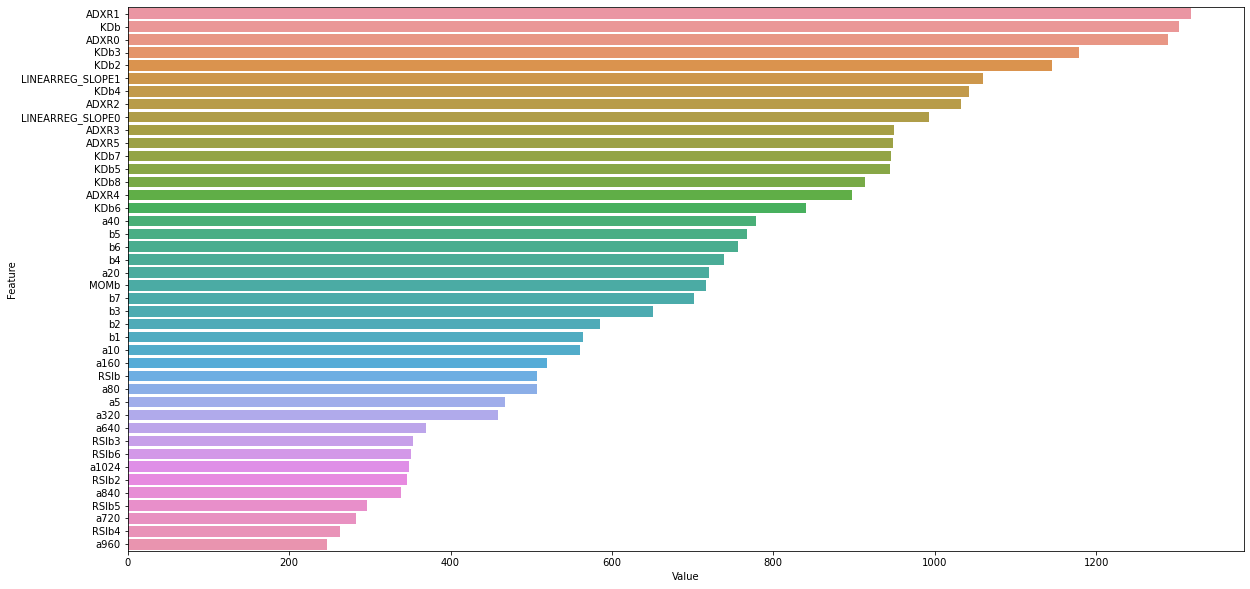

In [74]:
feature_imp = pd.DataFrame(sorted(zip(gbm.feature_importances_,feature_names)), columns=['Value','Feature'])
feature_imp

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))

## back test

In [75]:
ey = gbm.predict_proba(dataset[feature_names])
print(ey)
print("--------------")
ey = pd.Series(ey.swapaxes(0,1)[1], index=dataset.index)
print(type(ey),ey.shape)
print(ey)

[[0.17847835 0.82152165]
 [0.0743729  0.9256271 ]
 [0.0751988  0.9248012 ]
 ...
 [0.88349487 0.11650513]
 [0.90083483 0.09916517]
 [0.91303766 0.08696234]]
--------------
<class 'pandas.core.series.Series'> (52770,)
date
2004-08-13 09:30:00    0.821522
2004-08-13 10:00:00    0.925627
2004-08-13 10:30:00    0.924801
2004-08-13 11:00:00    0.950247
2004-08-13 11:30:00    0.944395
                         ...   
2020-05-29 12:30:00    0.250223
2020-05-29 13:00:00    0.167891
2020-05-29 13:30:00    0.116505
2020-05-29 14:00:00    0.099165
2020-05-29 14:30:00    0.086962
Length: 52770, dtype: float64


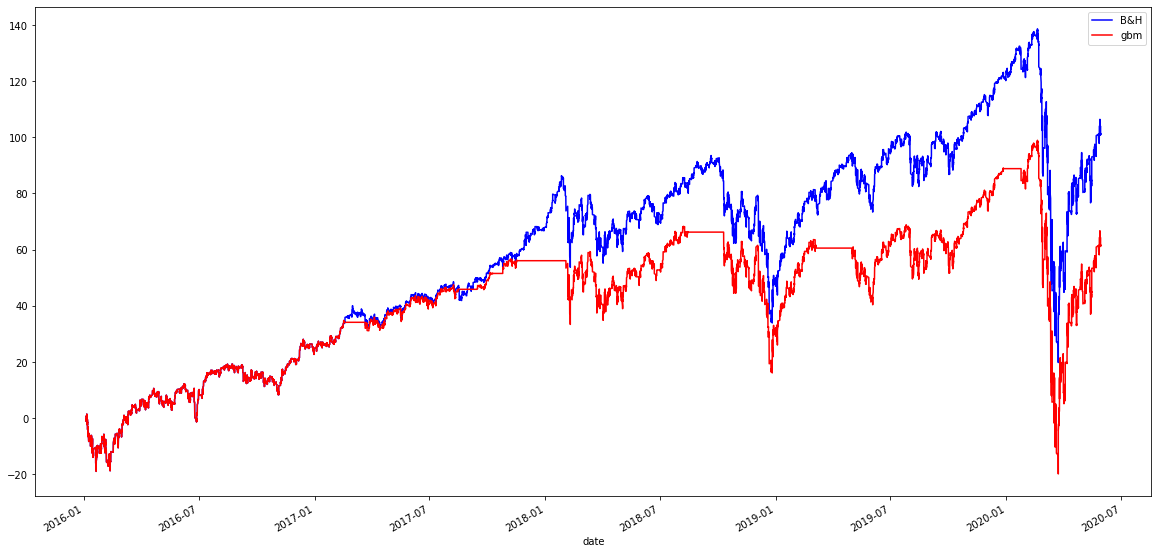

In [76]:

eq = tc[dataset.index]
gain = ((eq.shift(-1) - eq))

benchmark = gain["2016":].cumsum()

signal = (ey > ey.quantile(0.7)).rolling(215).sum() > 0

gain[signal==False]=0
eq = (gain['2016':]).cumsum()

plt.rcParams["figure.figsize"] = (20,10)
benchmark.plot(c="blue",label="B&H")
eq.plot(c="red",label="gbm")
plt.legend(loc='best')
plt.show()

c:\users\avlel\anaconda3\envs\om8mo\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
c:\users\avlel\anaconda3\envs\om8mo\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


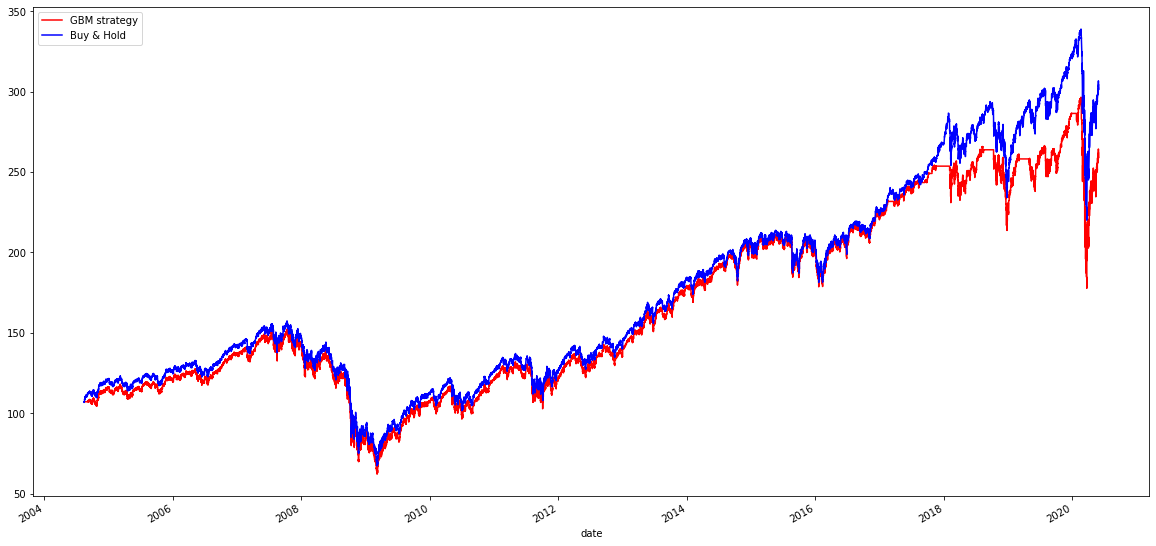

eqpc date
2004-08-13 10:00:00    0.0
2004-08-13 10:30:00    0.0
Name: close, dtype: float64


Start date,2004-08-13
End date,2020-05-29
Total months,2512
,Backtest
Annual return,0.428%
Cumulative returns,144.337%
Annual volatility,5.271%
Sharpe ratio,0.11
Calmar ratio,0.01
Stability,0.73
Max drawdown,-59.22%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,59.22,2007-10-11,2009-03-06,2013-04-09,1434
1,40.08,2020-02-19,2020-03-23,NaT,NaN
2,19.63,2018-08-07,2018-12-26,2019-07-26,253
3,15.39,2015-05-20,2016-01-20,2016-07-11,298
4,11.90,2007-07-16,2007-08-16,2007-10-05,60


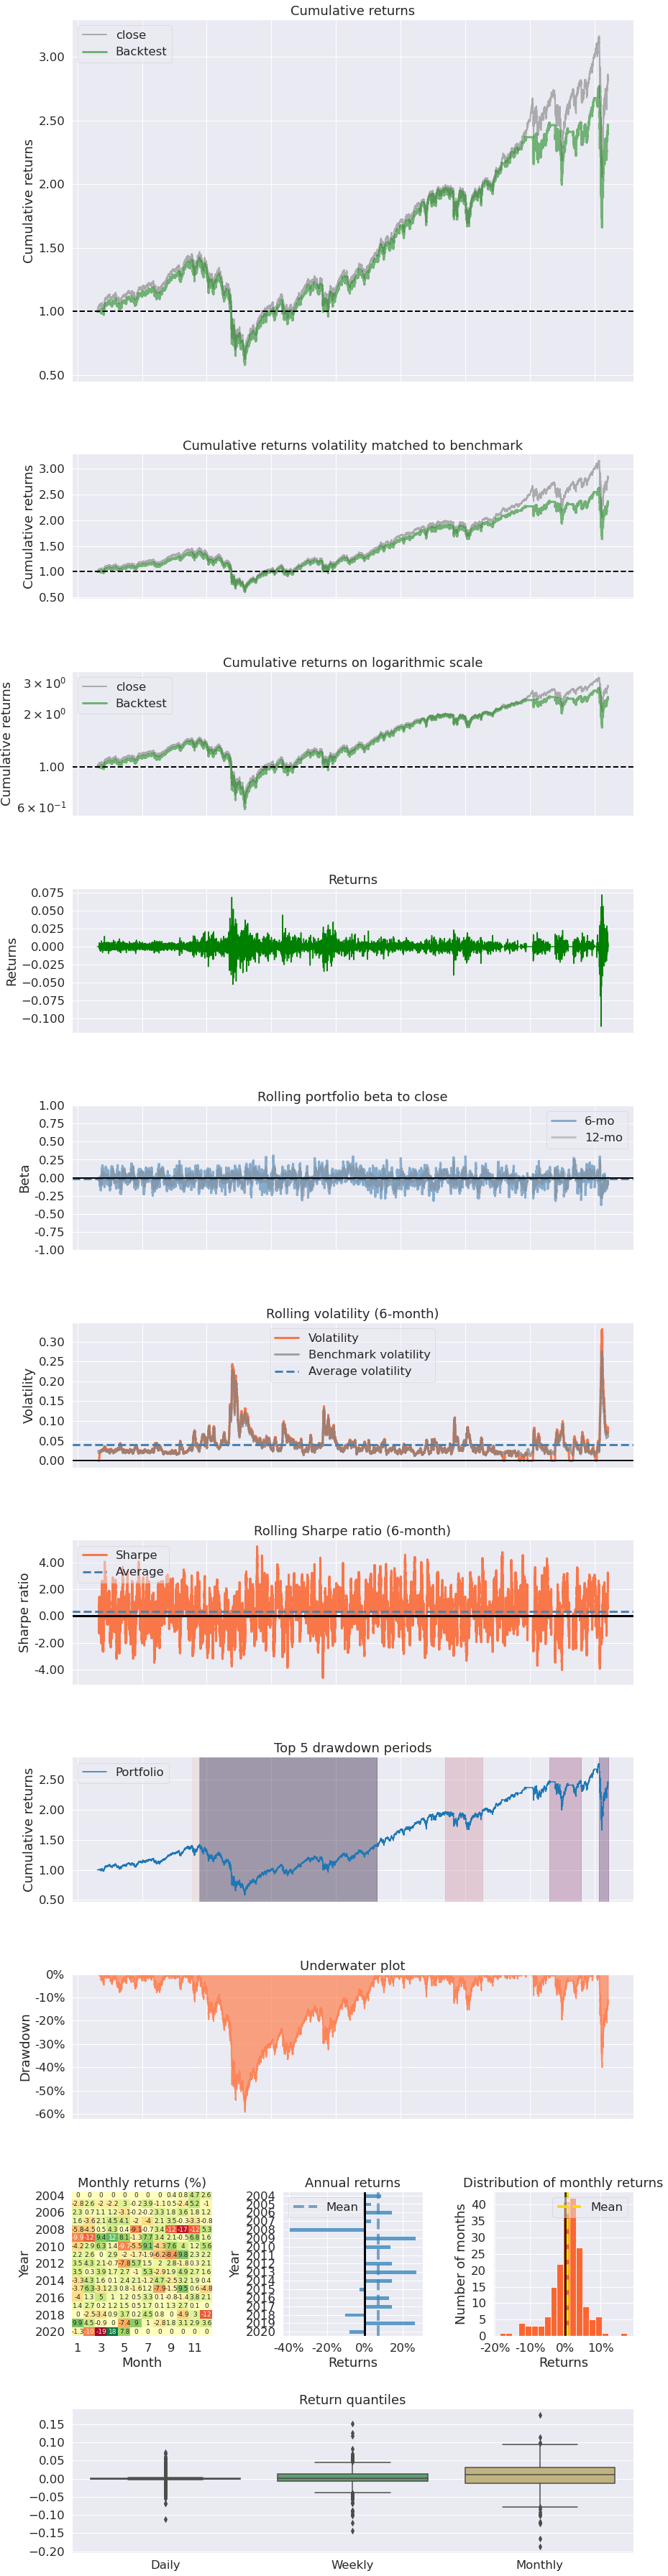

In [77]:
#Pyfolio
import pyfolio as pf
eq = tc[dataset.index]
gain = ((eq.shift(-1) - eq))
signal = (ey > ey.quantile(0.7)).rolling(215).sum() > 0
gain[signal==False]=0
creturn = gain.cumsum()
eq=creturn
# returns = tc.shift(-1)-tc
# returns[hold == 0] = 0
# creturn = returns.cumsum()
# eq=creturn



eq_relative = eq + tc[tc.index == eq.index[0]][0]
bm_relative = tc[eq.index[0]:]

eq_relative.plot(c="red",  label="GBM strategy")
bm_relative.plot(c="blue", label="Buy & Hold" )
        
plt.legend(loc='best')
plt.show()

eqpc = eq_relative.pct_change()
print("eqpc", eqpc[1:].head(2))
        
bmpc = bm_relative[1:].pct_change()
        
pf.create_returns_tear_sheet( eqpc[1:], benchmark_rets=bmpc[1:] )  #relative sharpe 0.5
    

In [78]:
def bt(bars):
    signal = (ey > ey.quantile(0.95)).rolling(bars).sum() > 0
    eq = (gain[signal]['2016':]).cumsum()
#     print(eq[-1])
    return eq[-1]
print( bt(100) )

60.90999999999991


In [79]:
# rmax=0
# for i in range (10,1000,10):
#     ans = bt(i)
#     if ans > rmax:
#         print(i,": ",ans)
#         rmax=ans


## Model Interpretation


In [80]:
#Recall and Precision


In [81]:
dataset['return']['2016':]

date
2016-01-04 08:30:00    False
2016-01-04 09:00:00    False
2016-01-04 09:30:00     True
2016-01-04 10:00:00     True
2016-01-04 10:30:00     True
                       ...  
2020-05-29 12:30:00    False
2020-05-29 13:00:00    False
2020-05-29 13:30:00    False
2020-05-29 14:00:00    False
2020-05-29 14:30:00    False
Name: return, Length: 14363, dtype: bool

In [82]:
 ey['2016':]

date
2016-01-04 08:30:00    0.231745
2016-01-04 09:00:00    0.304211
2016-01-04 09:30:00    0.766490
2016-01-04 10:00:00    0.837100
2016-01-04 10:30:00    0.874086
                         ...   
2020-05-29 12:30:00    0.250223
2020-05-29 13:00:00    0.167891
2020-05-29 13:30:00    0.116505
2020-05-29 14:00:00    0.099165
2020-05-29 14:30:00    0.086962
Length: 14363, dtype: float64

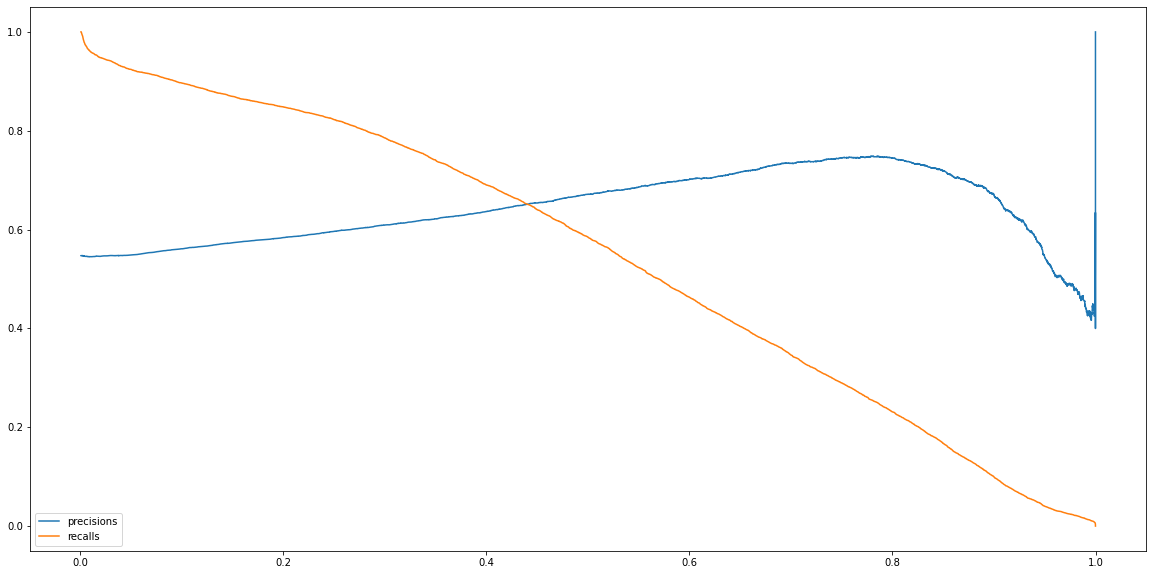

In [83]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(dataset['return']['2016':], ey['2016':])

pd.DataFrame({
    'precisions':precisions[:-1],
    'recalls':recalls[:-1],
}, index=thresholds).plot()
#

In [84]:
#ROC Curve


(6421,)
(6421,)
(6421,)


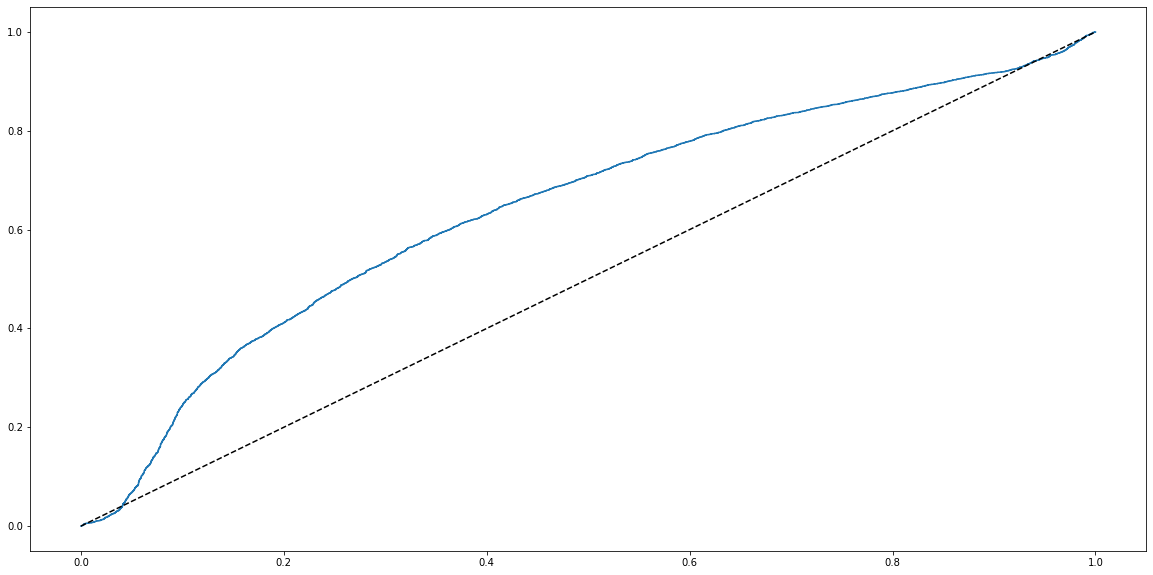

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(dataset['return']['2016':], ey['2016':])

print(fpr.shape)
print(tpr.shape)
print(thresholds.shape)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')

In [86]:
#traditional strategy KD

In [87]:
def backtest(k1, k2, plot=False):
    
    k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=tc.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = tc.shift(-1) - tc
    
    returns[hold==-1]=0
    
    if plot:
        (tc-tc[0])[:'2015'].plot(c='blue',label="Buy & Hold")
#         returns[hold == 1][:'2015'].cumsum().plot(c="red", label="Bias")
        returns[:'2015'].cumsum().plot(c="red", label="Bias")
        plt.legend(loc='best')
        plt.show()
    
        
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   



In [88]:
# maxr = 0
# for k1 in range(40, 100, 1):
#     for k2 in range(40, 100, 1):
#         if k1 <= k2:
#             continue
#         r = backtest(k1, k2)
#         if r > maxr:
#             print(r, k1, k2)
#             maxr = r

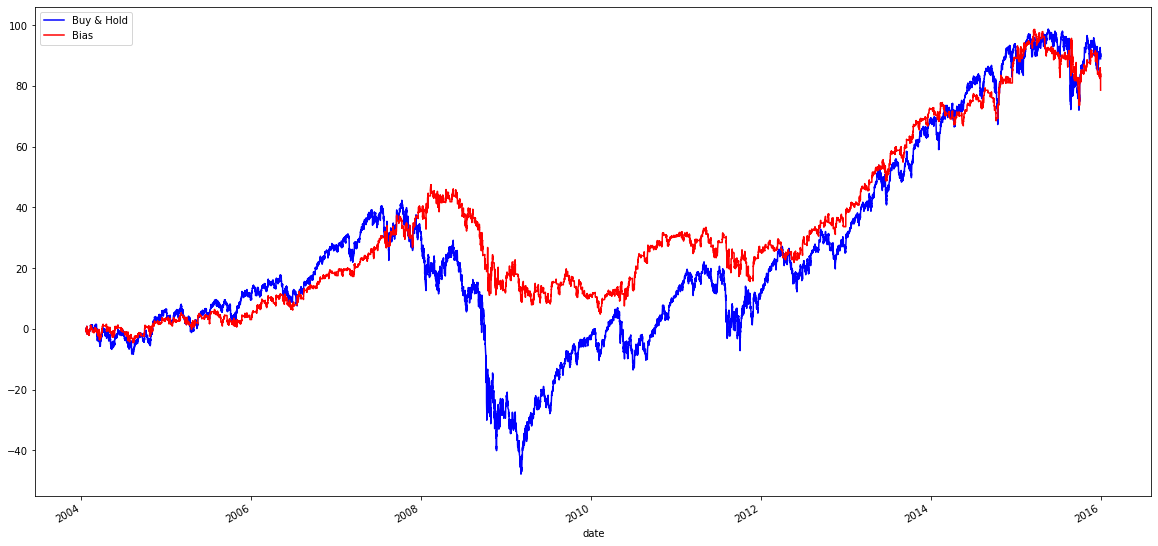

78.61999999999959

In [89]:
backtest(88, 40, True)

In [90]:
def backtest2(k1, k2, plot=False):

    k2, d2 = talib.STOCH(tc, tc, tc, fastk_period=k1, slowk_period=k2, slowd_period=k2/2)
    buy = k2 > d2
    sell = k2 < d2

    hold = pd.Series(np.nan, index=tc.index)
    hold[buy] = 1
    hold[sell] = -1
    hold.ffill(inplace=True)

    if (hold == 1).sum() == 0:
        return 1
    
    returns = tc.shift(-1) - tc
    
    returns[hold==-1]=0
    
    if plot:
        temp=tc['2015':]
        (temp-temp[0]).plot(c='blue',label="Buy & Hold")
#         returns[hold == 1][:'2015'].cumsum().plot(c="red", label="Bias")
        returns['2015':].cumsum().plot(c="red", label="Bias")
        plt.legend(loc='best')
        plt.show()
    
        
    
    return returns[hold == 1][:'2015'].cumsum().iloc[-1]
   

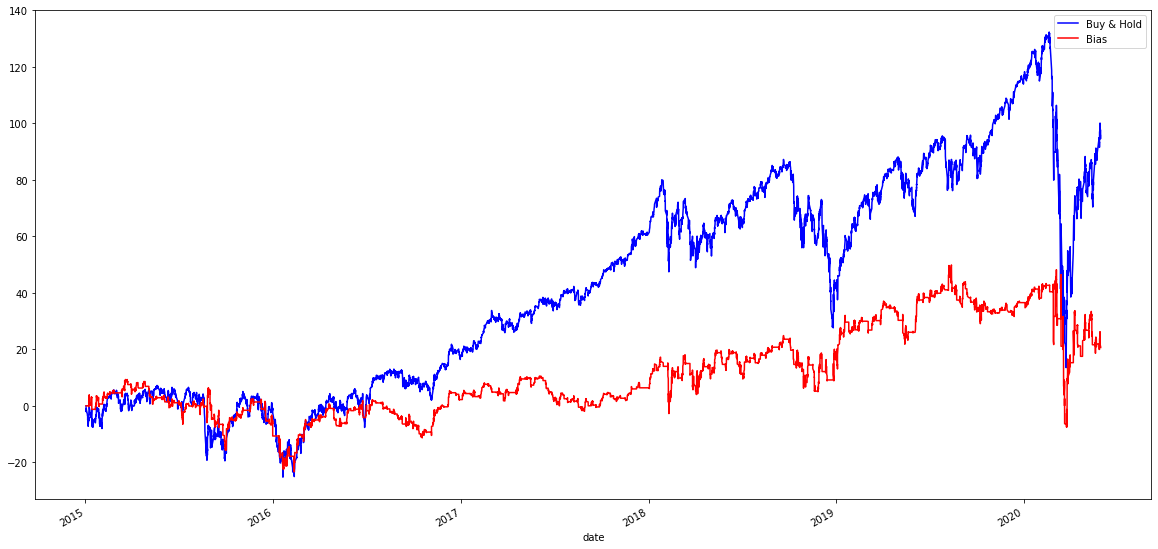

78.61999999999959

In [91]:
backtest2(88, 40, True)